# Learning with StandardScaler

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('/kaggle/input/social/Social_Network_Ads.csv')

In [3]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.head(20)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df.drop('Purchased', axis= 1), df['Purchased'], test_size= 0.3, random_state= 0)

In [6]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

# Useing Standardization

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [8]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [9]:
X_train_scaled= pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled= pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [10]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [11]:
np.round(X_test.describe(), 1)

,Age,EstimatedSalary
count,120.0,120.0
mean,37.2,69591.7
std,11.1,32933.7
min,18.0,15000.0
25%,28.0,47000.0
50%,36.0,64500.0
75%,45.2,87000.0
max,60.0,150000.0


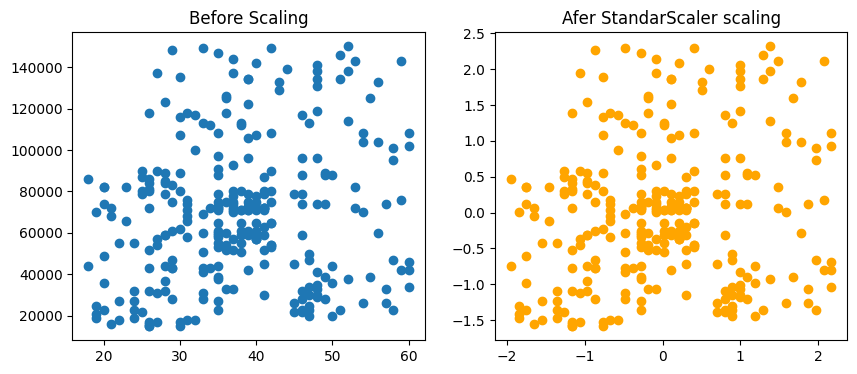

In [12]:
fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize= (10, 4))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color= 'orange')
ax2.set_title('Afer StandarScaler scaling')
plt.show()

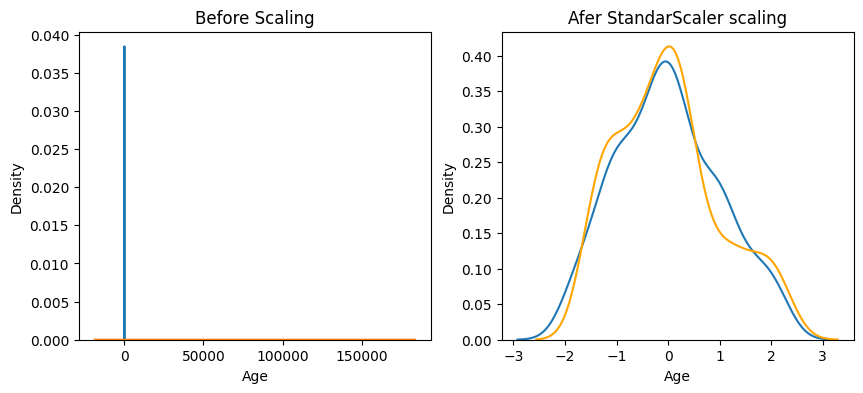

In [13]:
fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize= (10, 4))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax= ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title('Afer StandarScaler scaling')
sns.kdeplot(X_train_scaled['Age'], ax= ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax= ax2, color= 'orange')
plt.show()

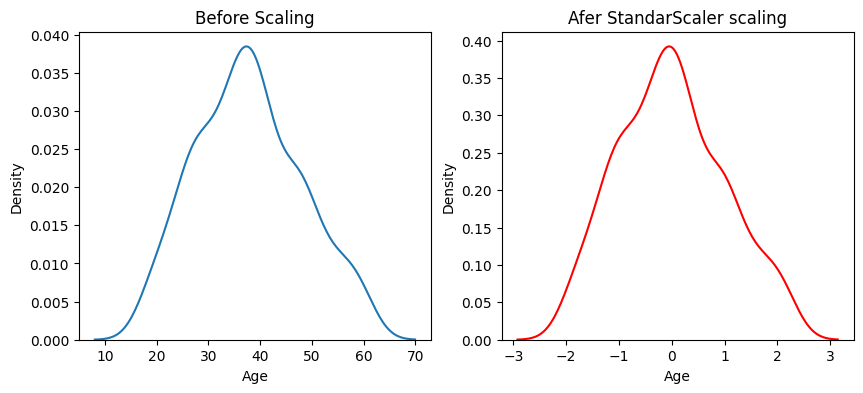

In [14]:
fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize= (10, 4))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax= ax1)

ax2.set_title('Afer StandarScaler scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2, color= 'red')
plt.show()

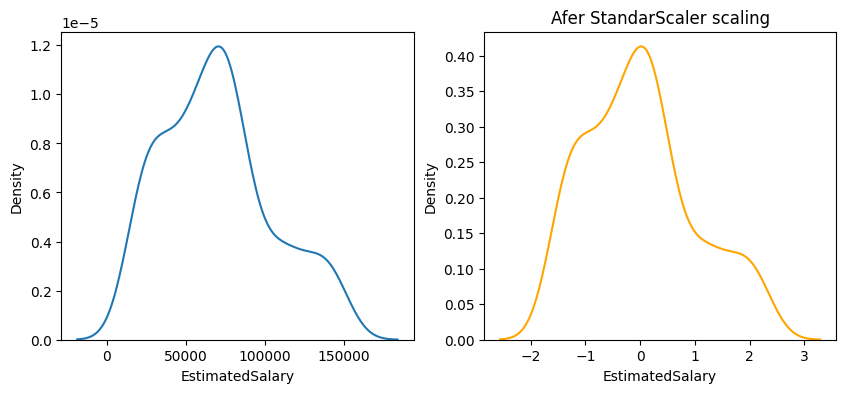

In [15]:
fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize=(10, 4))

ax2.set_title('Before StandarScaler scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax= ax1)

ax2.set_title('Afer StandarScaler scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax= ax2, color= 'orange')

plt.show()

In [16]:
# fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize=(10, 4))

# ax2.set_title('Before StandarScaler scaling')
# sns.histplot(X_train['EstimatedSalary'], ax= ax1, kde= True)

# ax2.set_title('Afer StandarScaler scaling')
# sns.hisplot(X_train_scaled['EstimatedSalary'], ax= ax2, color= 'orange', kde=True)

# plt.show()

# Train the LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr= LogisticRegression()
lr_scaled= LogisticRegression()

In [19]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
y_pred= lr.predict(X_test)
y_pred_scaled= lr_scaled.predict(X_test_scaled)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print('Actual Score', accuracy_score(y_test, y_pred))
print('Scaled Score', accuracy_score(y_test, y_pred_scaled))

Actual Score 0.6583333333333333
Scaled Score 0.8666666666666667


# Train the DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
le= DecisionTreeClassifier()
le_scaled= DecisionTreeClassifier()

In [25]:
le.fit(X_train, y_train)
le_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [26]:
y_pred= le.predict(X_test)
y_pred_scaled= le_scaled.predict(X_test_scaled)

In [27]:
print('Actual Score', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual Score 0.875
Scaled 0.8666666666666667


In [28]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Adding outlier data

In [29]:
df= pd.concat([df, pd.DataFrame({
    'Age': [5, 90, 98],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1,1]
})], ignore_index= True)

In [30]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


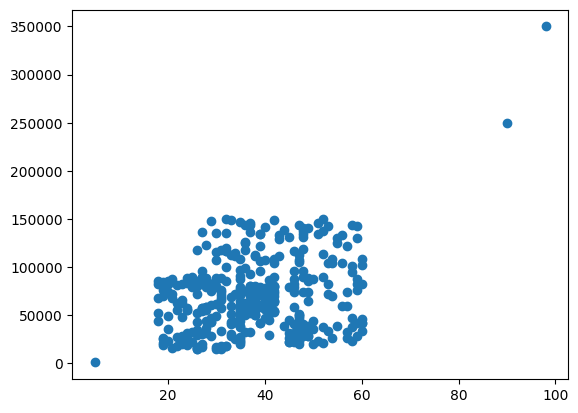

In [31]:
plt.scatter(df['Age'], df['EstimatedSalary'])